In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
!pip install prophet
from prophet import Prophet

In [24]:
file_path = r"C:\Users\KOWSALYA\Downloads\Cosmetics_Sales.csv.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

df.head()

,Order_ID,Order_Date,Customer_ID,Product_Name,Product_Category,Price,Quantity,Region,Customer_Age,Customer_Gender,Payment_Method,Delivery_Status,Revenue,Return_Flag
0,ORD100557,2023-01-01,CUST1697,Highlighter,Skin Care,1181,4,East,46,Male,Cash on Delivery,Delivered,4724,0
1,ORD100179,2023-01-01,CUST1004,Liquid Foundation,Eyes,1204,1,West,19,Other,Net Banking,Delivered,1204,0
2,ORD101080,2023-01-01,CUST1824,Makeup Remover,Skin Care,523,3,South,27,Male,UPI,Delivered,1569,0
3,ORD100520,2023-01-01,CUST1245,Sunscreen Lotion,Lips,946,4,East,44,Other,UPI,Delayed,3784,0
4,ORD101144,2023-01-02,CUST1662,Highlighter,Nails,1203,3,West,45,Male,Cash on Delivery,Delivered,3609,0


In [28]:
# Check dataset info
df.info()

# Check for null values
df.isnull().sum()

# Check unique values and sample data
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          2000 non-null   object        
 1   Order_Date        2000 non-null   datetime64[ns]
 2   Customer_ID       2000 non-null   object        
 3   Product_Name      2000 non-null   object        
 4   Product_Category  2000 non-null   object        
 5   Price             2000 non-null   int64         
 6   Quantity          2000 non-null   int64         
 7   Region            2000 non-null   object        
 8   Customer_Age      2000 non-null   int64         
 9   Customer_Gender   2000 non-null   object        
 10  Payment_Method    2000 non-null   object        
 11  Delivery_Status   2000 non-null   object        
 12  Revenue           2000 non-null   int64         
 13  Return_Flag       2000 non-null   int64         
dtypes: datetime64[ns](1), in

,Order_ID,Order_Date,Customer_ID,Product_Name,Product_Category,Price,Quantity,Region,Customer_Age,Customer_Gender,Payment_Method,Delivery_Status,Revenue,Return_Flag
count,2000,2000,2000,2000,2000,2000.0000,2000.000000,2000,2000.000000,2000,2000,2000,2000.000000,2000.000000
unique,2000,NaN,849,10,5,NaN,NaN,4,NaN,3,5,3,NaN,NaN
top,ORD100557,NaN,CUST1957,Sunscreen Lotion,Nails,NaN,NaN,West,NaN,Female,Credit Card,Delivered,NaN,NaN
freq,1,NaN,8,216,431,NaN,NaN,520,NaN,677,432,1628,NaN,NaN
mean,NaN,2023-07-04 18:30:14.400000,NaN,NaN,NaN,831.9085,2.498500,NaN,38.381000,NaN,NaN,NaN,2079.489000,0.046500
min,NaN,2023-01-01 00:00:00,NaN,NaN,NaN,150.0000,1.000000,NaN,18.000000,NaN,NaN,NaN,150.000000,0.000000
25%,NaN,2023-04-04 00:00:00,NaN,NaN,NaN,502.7500,1.000000,NaN,29.000000,NaN,NaN,NaN,998.500000,0.000000
50%,NaN,2023-07-06 00:00:00,NaN,NaN,NaN,830.0000,3.000000,NaN,38.000000,NaN,NaN,NaN,1704.000000,0.000000
75%,NaN,2023-10-05 00:00:00,NaN,NaN,NaN,1157.0000,4.000000,NaN,48.000000,NaN,NaN,NaN,2925.500000,0.000000
max,NaN,2023-12-31 00:00:00,NaN,NaN,NaN,1499.0000,4.000000,NaN,59.000000,NaN,NaN,NaN,5992.000000,1.000000


In [34]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'Product_Name',
       'Product_Category', 'Price', 'Quantity', 'Region', 'Customer_Age',
       'Customer_Gender', 'Payment_Method', 'Delivery_Status', 'Revenue',
       'Return_Flag'],
      dtype='object')

In [46]:
df['Date'] = pd.to_datetime(df['Order_Date'])

df.dropna(inplace=True)

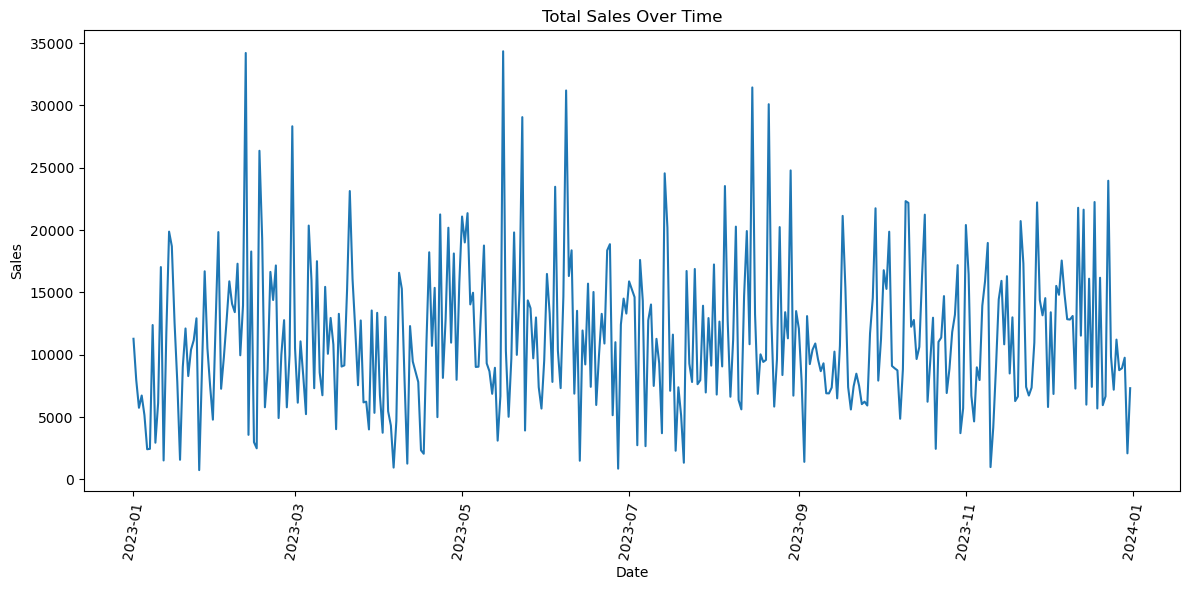

In [56]:
#Plot Revenue Trend Over Time
ales_trend = df.groupby('Date')['Revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Revenue', data=sales_trend)
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'Product_Name',
       'Product_Category', 'Price', 'Quantity', 'Region', 'Customer_Age',
       'Customer_Gender', 'Payment_Method', 'Delivery_Status', 'Revenue',
       'Return_Flag', 'Date'],
      dtype='object')

In [52]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

C:\Users\KOWSALYA\AppData\Local\Temp\ipykernel_18536\2080224465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='Revenue', y='Product_Category', palette='coolwarm')


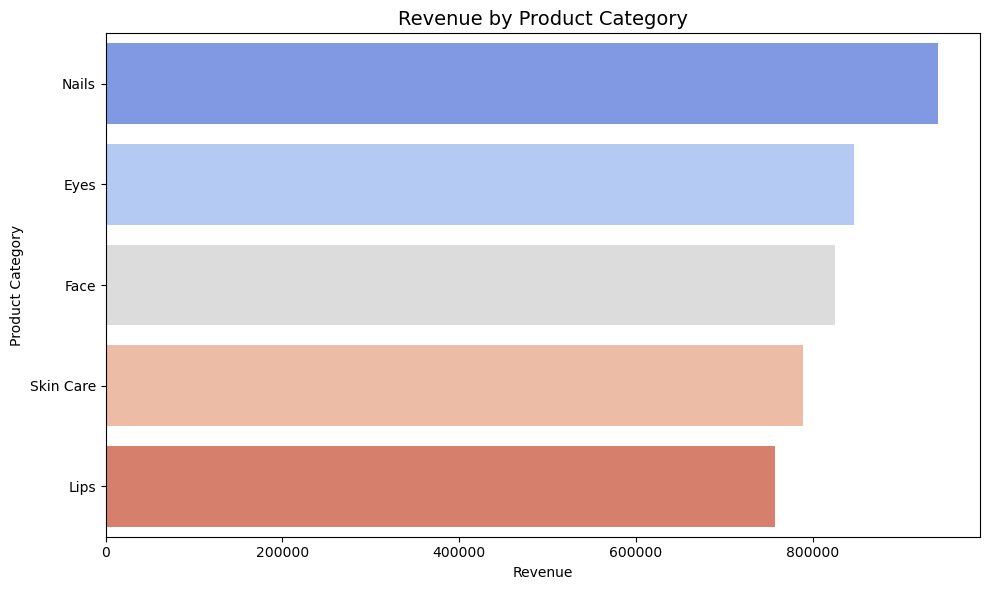

In [58]:
#Product Category-wise Revenue
category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=category_revenue, x='Revenue', y='Product_Category', palette='coolwarm')
plt.title("Revenue by Product Category", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

C:\Users\KOWSALYA\AppData\Local\Temp\ipykernel_18536\3523450399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_revenue, x='Revenue', y='Region', palette='viridis')


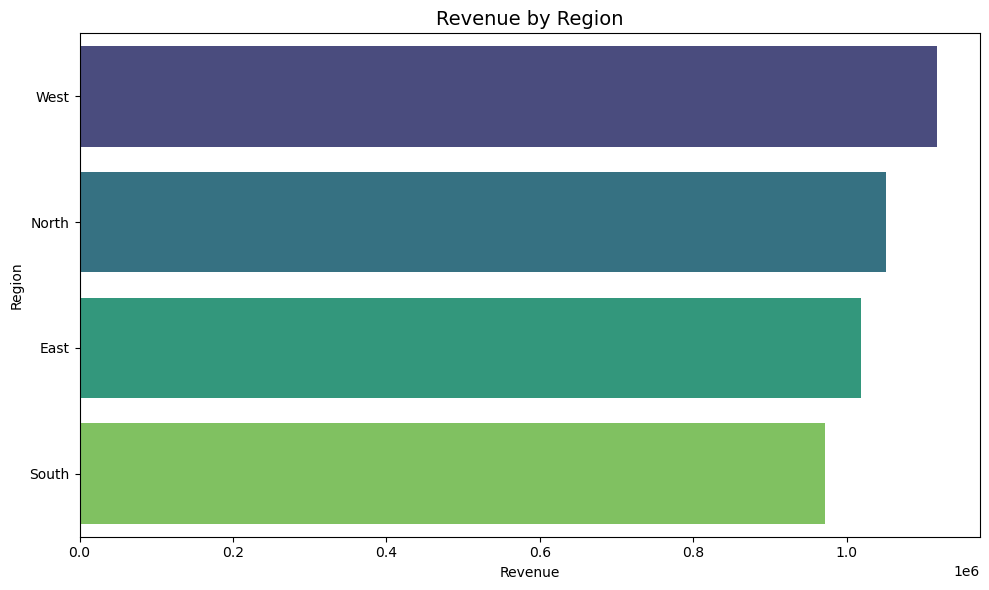

In [62]:
 #Region-wise Revenue
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=region_revenue, x='Revenue', y='Region', palette='viridis')
plt.title("Revenue by Region", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

C:\Users\KOWSALYA\AppData\Local\Temp\ipykernel_18536\2846713501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Revenue', y='Product_Name', palette='magma')


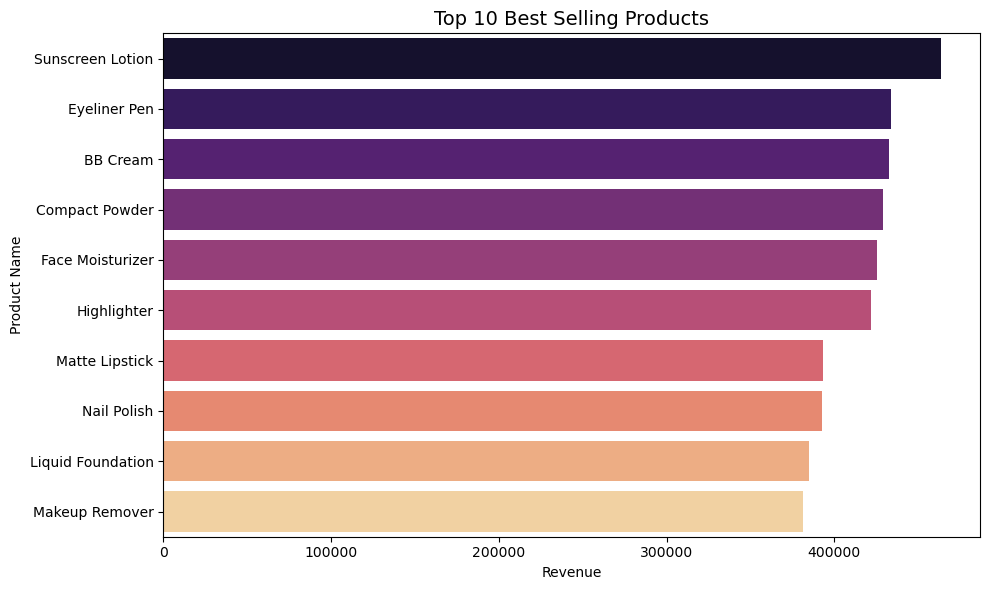

In [64]:
#Top Selling Products
top_products = df.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='Revenue', y='Product_Name', palette='magma')
plt.title("Top 10 Best Selling Products", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [66]:
# Create a new dataframe for Prophet
prophet_df = df.groupby('Order_Date')['Revenue'].sum().reset_index()
prophet_df.columns = ['ds', 'y']

# Check format
prophet_df.head()

,ds,y
0,2023-01-01,11281
1,2023-01-02,7985
2,2023-01-03,5748
3,2023-01-04,6731
4,2023-01-05,5154


In [68]:
model = Prophet()
model.fit(prophet_df)

00:00:00 - cmdstanpy - INFO - Chain [1] start processing
00:00:01 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

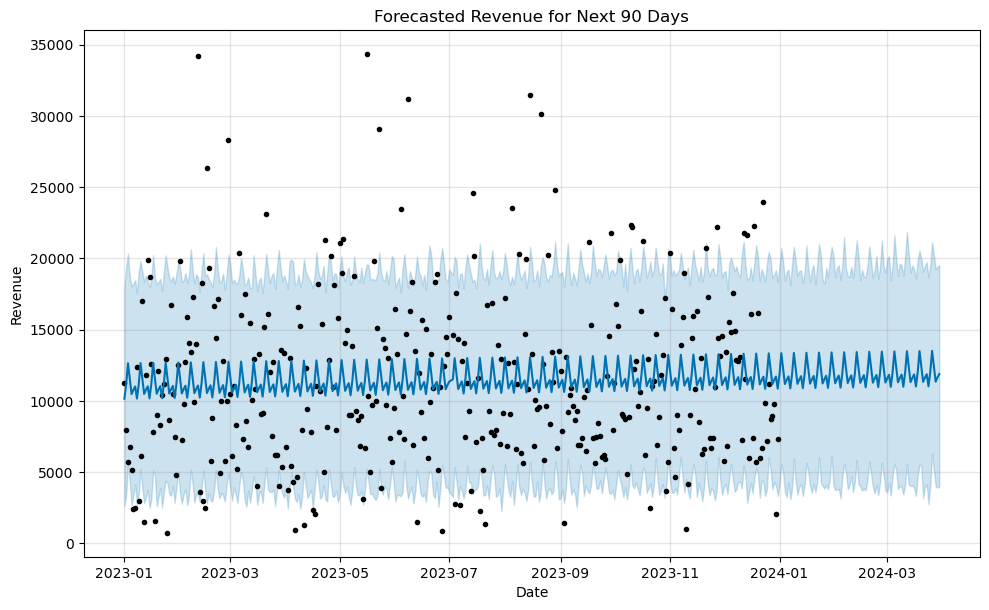

In [80]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Forecasted Revenue for Next 90 Days")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

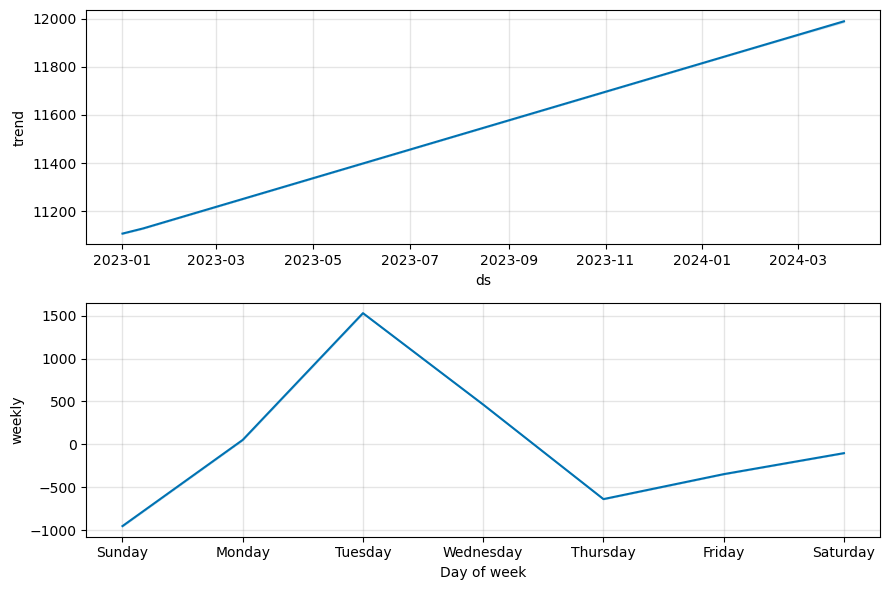

In [76]:
fig2 = model.plot_components(forecast)
plt.show()